# Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals:
Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized

Link for data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [228]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [229]:
data = pd.read_csv('bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [230]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [231]:
# to measure the strength of linear relationship between attributes
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


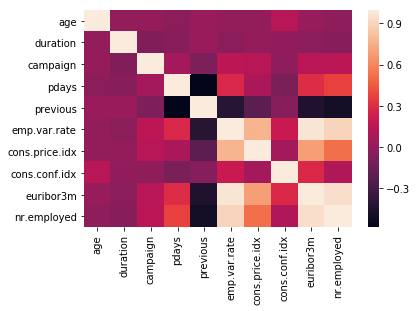

In [232]:
sns.heatmap(data.corr())

### Heat Map Analysis:
Non-Linear Data (Dark Areas) <br>
No two attributes completely correlated

## Feature Selection
Converting the given categorical data to a numerical form and selecting features

In [233]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [234]:
vector = DictVectorizer()
data_vec = vector.fit_transform(data.T.to_dict().values()).toarray()
features = vector.feature_names_
data_num= pd.DataFrame(data_vec,columns=features)
data_num.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


In [235]:
data_num.corr()['y=yes'].sort_values(ascending=False)

y=yes                            1.000000
duration                         0.405274
poutcome=success                 0.316269
previous                         0.230181
contact=cellular                 0.144773
month=mar                        0.144014
month=oct                        0.137366
month=sep                        0.126067
default=no                       0.099344
job=student                      0.093955
job=retired                      0.092221
month=dec                        0.079303
month=apr                        0.076136
cons.conf.idx                    0.054878
marital=single                   0.054133
education=university.degree      0.050364
poutcome=failure                 0.031799
job=admin.                       0.031426
age                              0.030399
education=unknown                0.021430
job=unemployed                   0.014752
day_of_week=thu                  0.013888
housing=yes                      0.011743
day_of_week=tue                  0

#### Strongest relationship of 'y=yes' is with Duration

In [236]:
X = data_num.drop(columns=['y=no','y=yes'])
Y = data_num['y=yes']
rf = RandomForestClassifier(n_estimators=250,random_state=0)
rf.fit(X,Y)
print ("Features sorted by their score:")
features_score = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features),reverse=True)
for i in features_score:
    print (i[1],'\t',i[0])
                              

Features sorted by their score:
duration 	 0.2831
euribor3m 	 0.0923
age 	 0.0793
nr.employed 	 0.053
campaign 	 0.0399
pdays 	 0.0279
cons.conf.idx 	 0.0265
poutcome=success 	 0.0248
cons.price.idx 	 0.0215
emp.var.rate 	 0.0192
housing=yes 	 0.0132
housing=no 	 0.0131
job=admin. 	 0.0121
education=university.degree 	 0.0119
marital=married 	 0.0116
previous 	 0.0109
day_of_week=thu 	 0.0108
day_of_week=mon 	 0.0108
education=high.school 	 0.0107
marital=single 	 0.0105
day_of_week=wed 	 0.0104
day_of_week=tue 	 0.0104
day_of_week=fri 	 0.01
job=technician 	 0.0097
loan=no 	 0.0094
loan=yes 	 0.0091
education=professional.course 	 0.0083
job=blue-collar 	 0.008
education=basic.9y 	 0.0077
poutcome=failure 	 0.0074
poutcome=nonexistent 	 0.0071
marital=divorced 	 0.0071
job=management 	 0.0064
contact=telephone 	 0.0064
contact=cellular 	 0.0063
job=services 	 0.0062
education=basic.4y 	 0.0061
job=retired 	 0.0056
default=no 	 0.0054
default=unknown 	 0.0052
month=oct 	 0.005
educatio

#### Most influential features duration, age, campaign

#### Working with the most influential feature Duration
(last contact duration in seconds)

Max call duration for y=yes:  4199.0
Min call duration for y=yes:  37.0
Average duration of last call in seconds when y=yes:  553.191163793


(array([ 279.,  813.,  729.,  517.,  441.,  410.,  354.,  258.,  225.,
         165.,  117.,   83.,   72.,   46.,   34.,   26.,   11.,   14.,
           8.,   12.,    4.,    3.,    2.,    5.,    1.,    3.,    1.,
           1.,    0.,    2.,    1.,    0.,    0.,    0.,    2.,    0.,
           0.,    0.,    0.,    1.]),
 array([   37.  ,   141.05,   245.1 ,   349.15,   453.2 ,   557.25,
          661.3 ,   765.35,   869.4 ,   973.45,  1077.5 ,  1181.55,
         1285.6 ,  1389.65,  1493.7 ,  1597.75,  1701.8 ,  1805.85,
         1909.9 ,  2013.95,  2118.  ,  2222.05,  2326.1 ,  2430.15,
         2534.2 ,  2638.25,  2742.3 ,  2846.35,  2950.4 ,  3054.45,
         3158.5 ,  3262.55,  3366.6 ,  3470.65,  3574.7 ,  3678.75,
         3782.8 ,  3886.85,  3990.9 ,  4094.95,  4199.  ]),
 <a list of 40 Patch objects>)

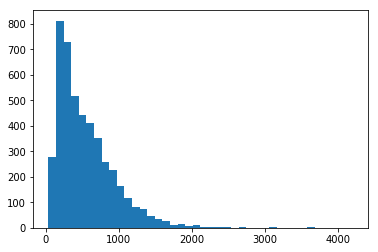

In [237]:
# duration for y=yes
print('Max call duration for y=yes: ',data_num[data_num['y=yes']==1.0]['duration'].max())
print('Min call duration for y=yes: ',data_num[data_num['y=yes']==1.0]['duration'].min())
avg_dur_y = sum(data_num[data_num['y=yes']==1.0]['duration'])/ data_num['y=yes'].sum()
print('Average duration of last call in seconds when y=yes: ',avg_dur_y)
plt.hist(data_num[data_num['y=yes']==1.0]['duration'],bins=40)

Max call duration for y=no:  4918.0
Min call duration for y=no:  0.0
Average duration of last call in seconds when y=no :  220.844806829


(array([  1.30410000e+04,   1.24240000e+04,   5.57400000e+03,
          2.56800000e+03,   1.28400000e+03,   6.67000000e+02,
          3.97000000e+02,   1.81000000e+02,   1.35000000e+02,
          1.03000000e+02,   5.10000000e+01,   3.90000000e+01,
          2.80000000e+01,   9.00000000e+00,   1.20000000e+01,
          1.10000000e+01,   5.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0.  ,   122.95,   245.9 ,   368.85,   491.8 ,   614.75,
          737.7 ,   860.65,   983.6 ,  1106.55,  1229.5 ,  1352.45,
         1475.4 ,  1598.35,  1

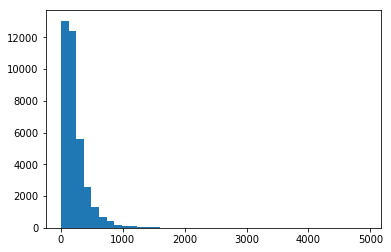

In [238]:
#duration for y=no
print('Max call duration for y=no: ',data_num[data_num['y=no']==1.0]['duration'].max())
print('Min call duration for y=no: ',data_num[data_num['y=no']==1.0]['duration'].min())
avg_dur_n = sum(data_num[data_num['y=no']==1.0]['duration'])/ data_num['y=no'].sum()
print('Average duration of last call in seconds when y=no : ', avg_dur_n)
plt.hist(data_num[data_num['y=no']==1.0]['duration'],bins=40)

##### For duration > 500, more chances for y=yes
##### Optimal duration period: 100-1500 seconds

#### Working with the feature Age
3 age groups are considered ( less than 30 yrs, >=30 and <=45, greater than 45 yrs)

In [239]:
# for age less than 30 years
print('for age less than 30 years')
print ("Call No. \t Efficiency")
for i in range(1,16):
    eff = float(data_num[(data_num['age']<30) & (data_num['campaign']==i)&(data_num['y=yes']==1)].shape[0]) / (float(data_num[(data_num['age']<30)&(data_num['campaign']>=i)].shape[0])+1)
    print (i," \t\t ",eff)

for age less than 30 years
Call No. 	 Efficiency
1  		  0.08148148148148149
2  		  0.07615167659041053
3  		  0.06682161533991865
4  		  0.04838709677419355
5  		  0.0432
6  		  0.02358490566037736
7  		  0.033003300330033
8  		  0.004672897196261682
9  		  0.01910828025477707
10  		  0.008130081300813009
11  		  0.0
12  		  0.0
13  		  0.01639344262295082
14  		  0.0
15  		  0.022222222222222223


##### No. of calls to consider = 7

In [240]:
# for age between 30 to 45 years
print('for age between 30 to 45 years')
print ("Call No. \t Efficiency")
for i in range(1,16):
    eff = float(data_num[(data_num['age']>=30)&(data_num['age']<=45)&(data_num['campaign']==i)&(data_num['y=yes']==1)].shape[0]) / (float(data_num[(data_num['age']>=30)&(data_num['age']<=45)&(data_num['campaign']>=i)].shape[0])+1)
    print (i," \t\t ",eff)

for age between 30 to 45 years
Call No. 	 Efficiency
1  		  0.0475326100721854
2  		  0.04240100287589411
3  		  0.03658210947930574
4  		  0.029485144023588115
5  		  0.02126176368072499
6  		  0.021660649819494584
7  		  0.008
8  		  0.0087890625
9  		  0.0076045627376425855
10  		  0.0110062893081761
11  		  0.019801980198019802
12  		  0.007633587786259542
13  		  0.006289308176100629
14  		  0.003816793893129771
15  		  0.0


##### No. of calls to consider = 6

In [241]:
# for age greater than 45 years
print('for age greater than 45 years')
print ("Call No. \t Efficiency")
for i in range(1,16):
    eff = float(data_num[(data_num['age']>45) & (data_num['campaign']==i)&(data_num['y=yes']==1)].shape[0]) / (float(data_num[(data_num['age']>45)&(data_num['campaign']>=i)].shape[0])+1)
    print (i," \t\t ",eff)

for age greater than 45 years
Call No. 	 Efficiency
1  		  0.06017579445571332
2  		  0.05781962630572311
3  		  0.04909766454352442
4  		  0.03173893607510058
5  		  0.021433355659745478
6  		  0.0224390243902439
7  		  0.023255813953488372
8  		  0.012915129151291513
9  		  0.018433179723502304
10  		  0.011834319526627219
11  		  0.007352941176470588
12  		  0.0
13  		  0.005235602094240838
14  		  0.0
15  		  0.006993006993006993


##### No. of calls to consider = 7

##### For all age groups efficient number of contacts to be made is around 6-7

#### Working with the feature Campaign
(number of contacts performed during this campaign)

In [242]:
print('All over average contacts: ',data['campaign'].sum()/data['campaign'].count())
print('Ratio of y=yes to total contacts made: ',data_num['y=yes'].sum()/data['campaign'].sum())
print('Ratio of y=no  to total contacts made: ',data_num['y=no'].sum()/data['campaign'].sum())

print ("Call No. \t Efficiency")
for i in range(1,16):
    eff = sum(data_num.loc[data_num['campaign']==i]['y=yes']) / float(data_num.loc[data_num['campaign'] >= i].shape[0])
    print (i," \t\t ",eff)

All over average contacts:  2.56759250267
Ratio of y=yes to total contacts made:  0.043875408968
Ratio of y=no  to total contacts made:  0.34559449288
Call No. 	 Efficiency
1  		  0.05584150723511702
2  		  0.05143124097511254
3  		  0.04423551171393342
4  		  0.03261296660117878
5  		  0.024077046548956663
6  		  0.022156573116691284
7  		  0.015793848711554447
8  		  0.009566685424873381
9  		  0.012345679012345678
10  		  0.010968921389396709
11  		  0.01380897583429229
12  		  0.004335260115606936
13  		  0.007054673721340388
14  		  0.002105263157894737
15  		  0.0049261083743842365


##### No. of calls to consider= 6

###### For high efficiency calls to be made = 6 (condidering  the feature campaign and age groups)

### Market Cost Reduction

In [243]:
# Reduction in marketing cost because of extra calls
total_contacts = data_num['campaign'].sum()
extra_contacts = sum(data_num[data_num['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0] 
reduction_1 = 100*extra_contacts/total_contacts
reduction_1

11.384912154622993

In [244]:
# Reduction in marketing cost because of extra duration
total_duration = data_num['duration'].sum()
wasted_duration = sum(data_num[data_num['duration']<100]['campaign'])
extra_duration = sum(data_num[data_num['duration']>1500]['campaign']) - 1500*df[df['campaign']>1500].shape[0]
reduction_2 = 100*(extra_duration+wasted_duration)/total_duration
reduction_2

0.31815404103854367

In [245]:
total_reduction= reduction_1 + reduction_2
total_reduction

11.703066195661536

### Prospects Maintained

In [246]:
total_prospects = float(df[df['y=yes']==1].shape[0])
preferred_prospects = float(data_num[(data_num['campaign']<=6)&(data_num['y=yes']==1)&(data_num['duration']<1500)].shape[0])
prospects_percentage = 100*preferred_prospects/total_prospects
prospects_percentage

94.87068965517241

### Market cost reduction: 11.7%
### Prospects Maintained: 94.87%